IRIS DATASET

In [129]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [130]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [131]:
df=pd.read_csv("/content/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [133]:
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [134]:
y_pred = clf.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_mat)
print(f'Accuracy: {accuracy:.2f}')


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.00


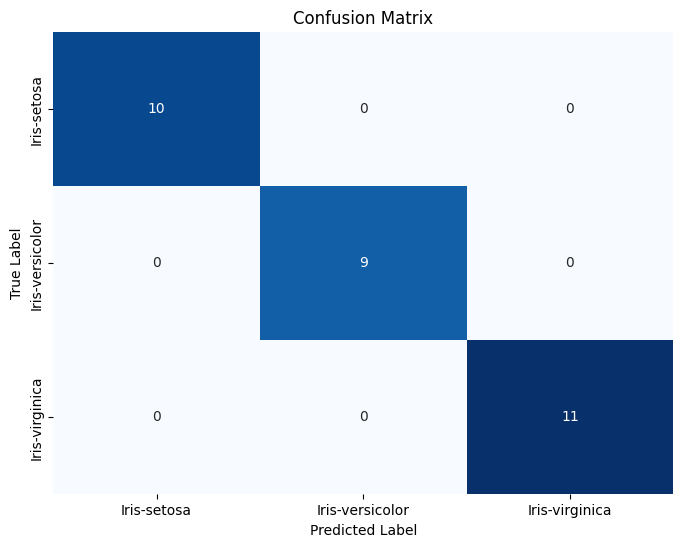

In [136]:
confusion_mat = confusion_matrix(y_test, y_pred)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
conf_matrix_df = pd.DataFrame(confusion_mat,
                               index=class_names,
                               columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

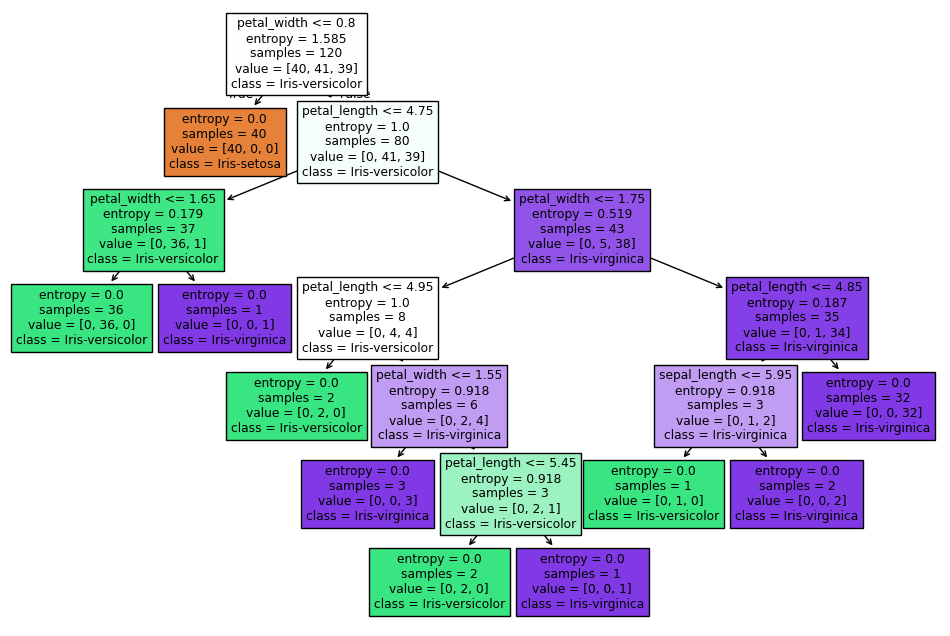

In [137]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

DRUG DATASET

In [138]:
df=pd.read_csv("/content/drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [139]:
label_encoders={}
categorical_columns=['Sex','BP','Cholesterol','Drug']
for column in categorical_columns:
  le=LabelEncoder()
  df[column]=le.fit_transform(df[column])
  label_encoders[column] = le

In [140]:
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [141]:
y_pred = clf.predict(X_test)

In [142]:
accuracy=accuracy_score(y_test,y_pred)
confusion_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_mat)
print(f'Accuracy: {accuracy:.2f}')

Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Accuracy: 1.00


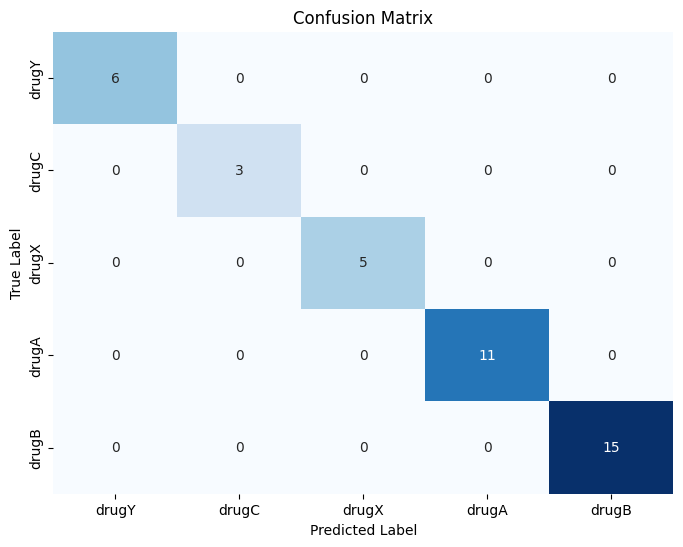

In [143]:
confusion_mat = confusion_matrix(y_test, y_pred)
class_names = ['drugY', 'drugC', 'drugX','drugA','drugB']
conf_matrix_df = pd.DataFrame(confusion_mat,
                               index=class_names,
                               columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

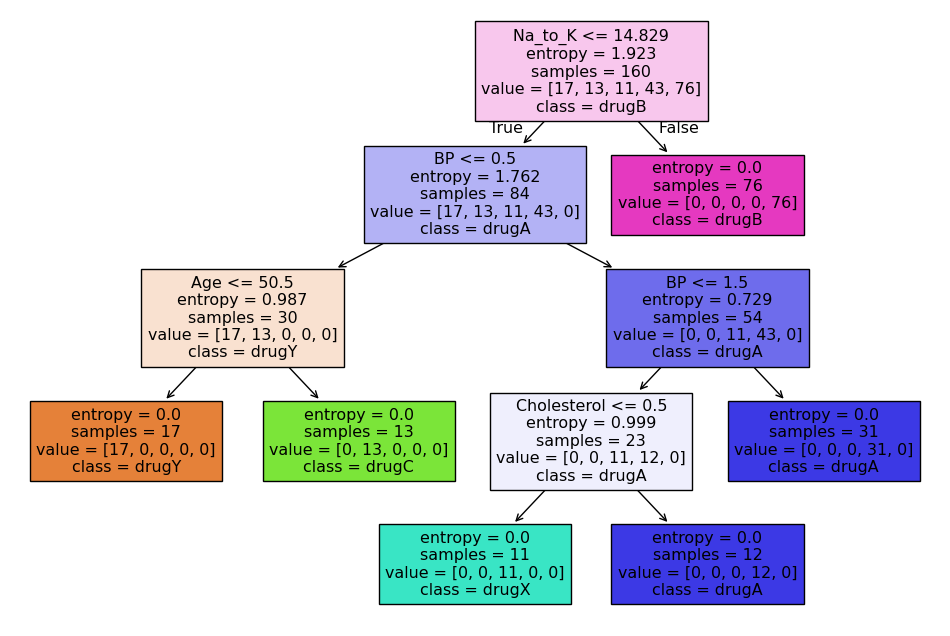

In [144]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['drugY', 'drugC', 'drugX','drugA','drugB'])
plt.show()

PETROL_CONSUMPTION DATASET

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [146]:
df=pd.read_csv("/content/petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [147]:
X=df.drop("Petrol_Consumption",axis=1)
y=df["Petrol_Consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
DTR=DecisionTreeRegressor(random_state=42)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [148]:
y_pred = DTR.predict(X_test)

In [149]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 94.30
Mean Squared Error: 17347.70
Root Mean Squared Error: 131.71


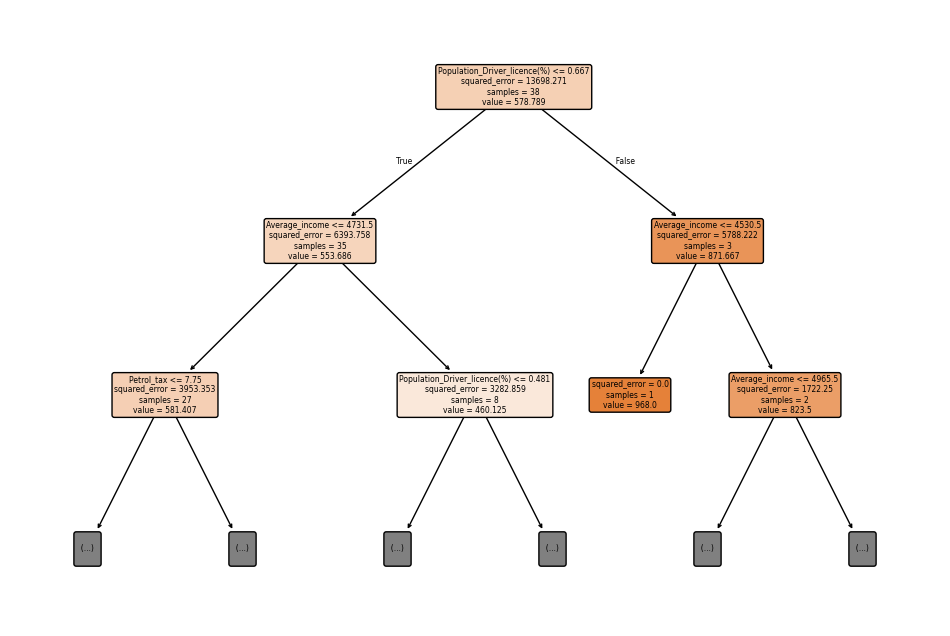

In [152]:
plt.figure(figsize=(12,8))
plot_tree(DTR, filled=True, feature_names=X.columns,rounded=True,max_depth=2)
plt.show()